In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/dis.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
STATE_UT_NAME    30 non-null object
DISTRICT         30 non-null object
JAN              30 non-null float64
FEB              30 non-null float64
MAR              30 non-null float64
APR              30 non-null float64
MAY              30 non-null float64
JUN              30 non-null float64
JUL              30 non-null float64
AUG              30 non-null float64
SEP              30 non-null float64
OCT              30 non-null float64
NOV              30 non-null float64
DEC              30 non-null float64
ANNUAL           30 non-null float64
Jan-Feb          30 non-null float64
Mar-May          30 non-null float64
Jun-Sep          30 non-null float64
Oct-Dec          30 non-null float64
dtypes: float64(17), object(2)
memory usage: 4.6+ KB


In [4]:
print(data.head())

  STATE_UT_NAME       DISTRICT  JAN  FEB   MAR   APR    MAY     JUN     JUL  \
0     KARNATAKA  UTTAR KANNADA  0.3  0.1   2.7  22.1  114.0   740.9  1053.8   
1     KARNATAKA  DAKSHIN KANDA  1.9  0.7   6.4  39.8  180.9   977.2  1227.2   
2     KARNATAKA          UDUPI  1.4  0.4   4.1  29.4  193.8  1081.0  1371.6   
3     KARNATAKA         BELGAM  0.7  0.9   6.2  30.2   74.8   130.4   204.0   
4     KARNATAKA          BIDAR  5.9  6.1  10.1  21.7   31.4   137.1   190.7   

     AUG    SEP    OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0  667.7  258.5  155.1  44.1  11.2  3070.5      0.4    138.8   2720.9    210.4  
1  833.6  313.6  236.9  82.0  15.6  3915.8      2.6    227.1   3351.6    334.5  
2  902.2  404.9  223.8  74.6  18.8  4306.0      1.8    227.3   3759.7    317.2  
3  126.7  113.0  116.6  30.6   5.1   839.2      1.6    111.2    574.1    152.3  
4  196.6  170.5   93.5  20.9   6.2   890.7     12.0     63.2    694.9    120.6  


In [5]:
print(data.describe())

             JAN        FEB        MAR        APR         MAY          JUN  \
count  30.000000  30.000000  30.000000  30.000000   30.000000    30.000000   
mean    2.026667   2.696667   7.163333  36.773333   88.166667   204.880000   
std     1.259429   1.960029   3.636072  16.850723   40.632765   273.931535   
min     0.300000   0.100000   2.500000  17.700000   31.400000    48.700000   
25%     1.325000   0.925000   4.250000  24.075000   59.650000    72.250000   
50%     1.750000   2.600000   6.350000  33.750000   78.400000    83.400000   
75%     2.400000   4.050000   9.625000  44.875000  106.200000   129.050000   
max     5.900000   6.700000  18.500000  89.800000  193.800000  1081.000000   

               JUL         AUG         SEP         OCT        NOV        DEC  \
count    30.000000   30.000000   30.000000   30.000000  30.000000  30.000000   
mean    280.700000  209.256667  164.076667  143.356667  44.350000  11.170000   
std     374.960968  232.682348   64.369069   34.699406  1

In [7]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [8]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [9]:
temp = data[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['STATE_UT_NAME'] == 'KARNATAKA']
kar = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'KARNATAKA'])
# print temp
X_year = None; y_year = None
for i in range(kar.shape[1]-3):
    if X_year is None:
        X_year = kar[:, i:i+3]
        y_year = kar[:, i+3]
    else:
        X_year = np.concatenate((X_year, kar[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, kar[:, i+3]), axis=0)

In [10]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

33.26531852863506


In [11]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Using TensorFlow backend.






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
______

In [12]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))




Train on 234 samples, validate on 27 samples
Epoch 1/10





234/234 [==============================] - 2s 8ms/step - loss: 44414.4864 - mean_absolute_error: 104.5360 - val_loss: 13684.1924 - val_mean_absolute_error: 71.2459
Epoch 2/10
234/234 [==============================] - 0s 202us/step - loss: 23798.5584 - mean_absolute_error: 79.8671 - val_loss: 20644.9102 - val_mean_absolute_error: 85.4287
Epoch 3/10
234/234 [==============================] - 0s 168us/step - loss: 17532.5554 - mean_absolute_error: 70.0851 - val_loss: 8239.7383 - val_mean_absolute_error: 57.5291
Epoch 4/10
234/234 [==============================] - 0s 181us/step - loss: 14161.8016 - mean_absolute_error: 59.2831 - val_loss: 4771.2446 - val_mean_absolute_error: 43.9154
Epoch 5/10
234/234 [==============================] - 0s 162us/step - loss: 12323.1828 - mean_absolute_error: 53.5718 - val_loss: 3284.2598 - val_mean_absolute_error: 38.9371
Epoch 6/10
234/234 [==============================] - 0s 173us/step - l

AxesSubplot(0.125,0.125;0.775x0.755)


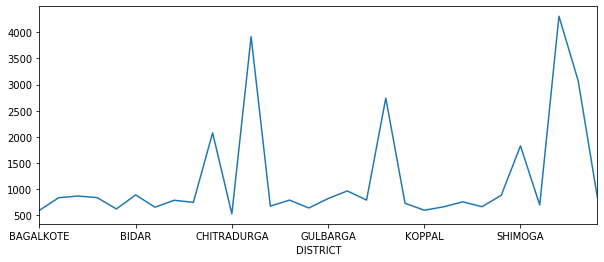

In [13]:
print(data.groupby("DISTRICT").sum()['ANNUAL'].plot(figsize=(10,4)))

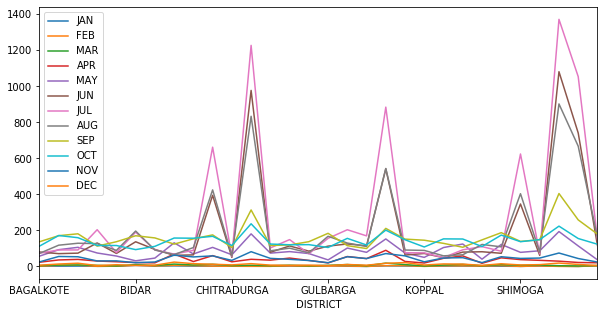

In [14]:
data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").sum().plot(figsize=(10,5));

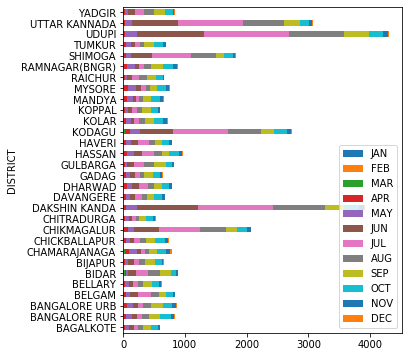

In [15]:
data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean().plot.barh(stacked=True,figsize=(5,6));

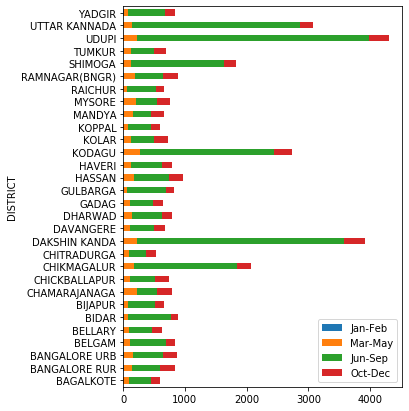

In [16]:
data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum().plot.barh(stacked=True,figsize=(5,7));

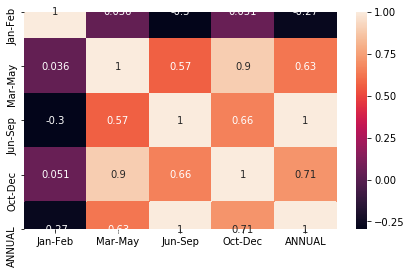

In [17]:
plt.figure(figsize=(7,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()